In [399]:
# importando as bibliotecas
import numpy as np
import pandas as pd
import random
from tqdm.auto import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import v_measure_score

In [400]:
# importando os modulos definidos
from src.Node import Node

# Carregamento de dados

In [401]:
def load_dataset(dataset_name, header=None):
    train_path = f'./data/{dataset_name}train.csv'
    test_path = f'./data/{dataset_name}test.csv'

    train_data = pd.read_csv(filepath_or_buffer=train_path, header=header)
    test_data = pd.read_csv(filepath_or_buffer=test_path, header=header)
    
    return train_data, test_data

In [402]:
breast_cancer_train_data, breast_cancer_test_data = load_dataset('breast_cancer_coimbra_', header=0)
print(breast_cancer_train_data.shape, breast_cancer_test_data.shape)

(92, 10) (24, 10)


In [403]:
breast_cancer_train_data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,44,20.760000,86,7.553,1.600000,14.0900,20.320000,7.64000,63.610,1
1,46,20.830000,88,3.420,0.742368,12.8700,18.550000,13.56000,301.210,2
2,53,36.790166,101,10.175,2.534932,27.1841,20.030000,10.26309,695.754,1
3,54,30.483158,90,5.537,1.229214,12.3310,9.731380,10.19299,1227.910,1
4,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2


* 0 - fixed acidity (tartaric acid - g / dm^3)
* 1 - volatile acidity (acetic acid - g / dm^3)
* 2 - citric acid (g / dm^3)
* 3 - residual sugar (g / dm^3)
* 4 - chlorides (sodium chloride - g / dm^3)
* 5 - free sulfur dioxide (mg / dm^3)
* 6 - total sulfur dioxide (mg / dm^3)
* 7 - density (g / cm^3)
* 8 - pH
* 9 - sulphates (potassium sulphate - g / dm3)
* 10 - alcohol (% by volume)
* 11 - quality (score between 0 and 10) - output variable

In [404]:
wine_train_data, wine_test_data = load_dataset('wineRed-', header=None)
print(wine_train_data.shape, wine_test_data.shape)

(1279, 12) (320, 12)


In [405]:
wine_train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.640,0.17,5.40,0.168,52.0,98.0,0.99736,3.28,0.50,9.5,5
1,10.4,0.440,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,7
2,10.7,0.430,0.39,2.20,0.106,8.0,32.0,0.99860,2.89,0.50,9.6,5
3,8.9,0.635,0.37,1.70,0.263,5.0,62.0,0.99710,3.00,1.09,9.3,5
4,7.8,0.570,0.09,2.30,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8


In [406]:
wine_train_labels = wine_train_data.iloc[:, -1]
wine_train_data = wine_train_data.iloc[:, :-1]

wine_test_labels = wine_test_data.iloc[:, -1]
wine_test_data = wine_test_data.iloc[:, :-1]

In [407]:
wine_train_data

,0,1,2,3,4,5,6,7,8,9,10
0,7.4,0.640,0.17,5.40,0.168,52.0,98.0,0.99736,3.28,0.50,9.5
1,10.4,0.440,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0
2,10.7,0.430,0.39,2.20,0.106,8.0,32.0,0.99860,2.89,0.50,9.6
3,8.9,0.635,0.37,1.70,0.263,5.0,62.0,0.99710,3.00,1.09,9.3
4,7.8,0.570,0.09,2.30,0.065,34.0,45.0,0.99417,3.46,0.74,12.7
...,...,...,...,...,...,...,...,...,...,...,...
1274,11.4,0.460,0.50,2.70,0.122,4.0,17.0,1.00060,3.13,0.70,10.2
1275,9.4,0.410,0.48,4.60,0.072,10.0,20.0,0.99730,3.34,0.79,12.2
1276,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4
1277,8.9,0.610,0.49,2.00,0.270,23.0,110.0,0.99720,3.12,1.02,9.3


### Transformação de dados

In [408]:
def normalize(train_data, test_data):
    scaler = StandardScaler()
    scaler.fit(train_data)
    return scaler.transform(train_data), scaler.transform(test_data)

In [409]:
wine_train_data_normalized,wine_test_data_normalized = normalize(wine_train_data,wine_test_data)
wine_train_data_normalized

array([[-0.53853669,  0.64402546, -0.52757169, ..., -0.18069448,
        -0.91985987, -0.85278319],
       [ 1.19150792, -0.4811826 ,  2.33832098, ..., -0.90086181,
         1.08391273,  1.50932148],
       [ 1.36451238, -0.537443  ,  0.59831471, ..., -2.73401502,
        -0.91985987, -0.75829901],
       ...,
       [-0.82687746,  0.08142143, -1.19286821, ...,  2.50356557,
         1.42741661, -0.94726738],
       [ 0.32648561,  0.47524425,  1.11008126, ..., -1.2282106 ,
         2.05717371, -1.04175157],
       [-0.59620484,  2.55687915, -1.14169155, ...,  0.01571479,
        -0.63360664, -0.66381482]])

# Modelagem dos indivíduos

In [410]:
TAMANHO_MAXIMO_INDIVIDUO = 7
TERMINAIS = ['+', '-', '*', '/']

In [411]:
random.seed(42)

In [ ]:
def generate_random_tree(max_depth: int, current_depth: int, terminals: list, variables:list) -> Node:

    if current_depth == max_depth-1 or (current_depth > 1 and random.random() > 0.5):
        # Gera um nó folha: variável ou constante
        value = random.choice(variables)
        return Node(value)
    # Decide aleatoriamente entre gerar operador ou folha
    else:
        # Gera operador
        op = random.choice(terminals)
        left_subtree = generate_random_tree(max_depth, current_depth + 1, terminals, variables)
        right_subtree = generate_random_tree(max_depth, current_depth + 1, terminals, variables)
        return Node(op, left_subtree, right_subtree)

In [ ]:
def initialize_population_grow(pop_size:int, max_depth:int, terminals:list, variables:list) -> list:
    population = []
    for _ in tqdm(range(pop_size),desc='Initializing population'):
        tree = generate_random_tree(max_depth=max_depth, current_depth=0, terminals=terminals, variables=variables)
        population.append(tree)

    return population

# Fitness

In [421]:
def evaluate_tree(node, example1, example2):
    if node.is_leaf():
        if isinstance(node.value, str):
            return example1[node.value] - example2[node.value]
        else:
            return float(node.value)
    else:
        func = node.operators[node.value]
        if func is None:
            raise ValueError(f"Operador desconhecido: {node.value}")
        left_val = evaluate_tree(node.left, example1, example2)
        right_val = evaluate_tree(node.right, example1, example2)
        return func(left_val, right_val)

In [422]:
def compute_distance_matrix(tree, X):
    num_examples = X.shape[0]
    distance_matrix = np.zeros((num_examples, num_examples))
    
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=[f'x{i}' for i in range(X.shape[1])])
    
    for i in range(num_examples):
        for j in range(i + 1, num_examples):
            example1 = X.iloc[i].to_dict()
            example2 = X.iloc[j].to_dict()
            dist = evaluate_tree(tree, example1, example2)
            # Usar valor absoluto para garantir que a distância seja não negativa
            distance_matrix[i, j] = abs(dist)
            distance_matrix[j, i] = distance_matrix[i, j]  # Matriz simétrica
    return distance_matrix

In [423]:
def evaluate_fitness(individual, X, y_true):
    distance_matrix = compute_distance_matrix(individual, X)
    
    num_clusters = len(np.unique(y_true))
    
    clustering = AgglomerativeClustering(n_clusters=num_clusters, metric='precomputed', linkage='average')
    clustering.fit(distance_matrix)
    
    y_pred = clustering.labels_
    
    fitness = v_measure_score(y_true, y_pred)
    
    return fitness

In [424]:
def calculate_fitness_population(population, X, y_true):
    fitness_scores = []
    for individual in tqdm(population, total=len(population), desc='Calculating fitness'):
        fitness = evaluate_fitness(individual, X, y_true)
        fitness_scores.append(fitness)
    return fitness_scores

# Operadores

In [427]:
import copy

In [428]:
def crossover(parent1: Node, parent2: Node, method: str='') -> tuple:
    # Faz uma cópia profunda dos pais para não modificar os originais
    child1 = copy.deepcopy(parent1)
    child2 = copy.deepcopy(parent2)
    
    # Obter todos os nós das árvores
    nodes1 = child1.get_all_nodes()
    nodes2 = child2.get_all_nodes()
    
    # Selecionar nós aleatórios para troca
    crossover_point1 = random.choice(nodes1)
    crossover_point2 = random.choice(nodes2)
    
    # Realizar o crossover
    crossover_point1.value, crossover_point2.value = crossover_point2.value, crossover_point1.value
    crossover_point1.left, crossover_point2.left = crossover_point2.left, crossover_point1.left
    crossover_point1.right, crossover_point2.right = crossover_point2.right, crossover_point1.right
    
    return child1, child2

In [434]:
def mutate(individual, terminals, variables, max_depth, method):
    mutant = copy.deepcopy(individual)
    
    # Obter todos os nós
    nodes = mutant.get_all_nodes()
    
    # Selecionar um nó aleatório para mutação
    mutation_point = random.choice(nodes)
    
    # Gerar uma nova subárvore
    new_subtree = generate_random_tree(max_depth=max_depth, current_depth=0, terminals=terminals, variables=variables, method=method)
    
    # Substituir a subárvore no ponto de mutação
    mutation_point.value = new_subtree.value
    mutation_point.left = new_subtree.left
    mutation_point.right = new_subtree.right
    
    return mutant

In [ ]:
def selection(population, fitness_scores, tournament_size=0):
    selected = []
    for _ in range(len(population)):
        # Seleciona indivíduos aleatoriamente para o torneio
        tournament = random.sample(list(zip(population, fitness_scores)), tournament_size)
        # Seleciona o melhor do torneio
        winner = max(tournament, key=lambda x: x[1])[0]
        selected.append(winner)
    return selected

# Algoritmo GP

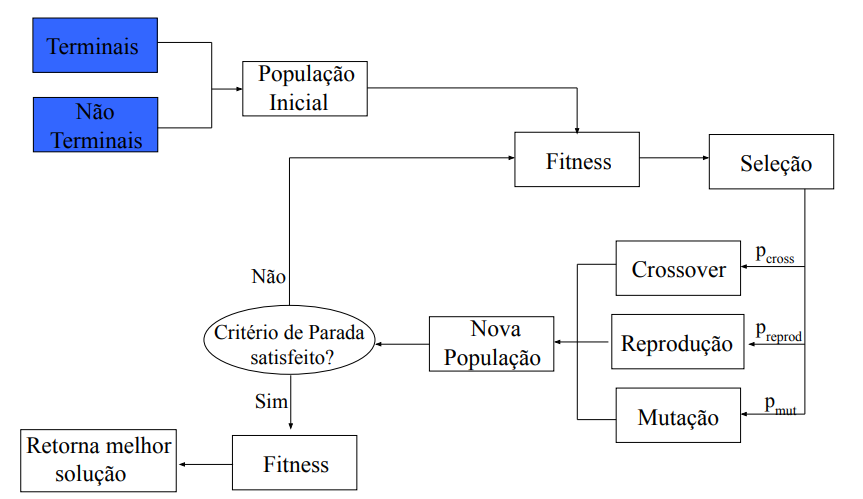

In [456]:
# parametros iniciais

MAX_DEPTH = 7
POP_SIZE = 15
NUM_GENERATIONS = 10
TOURNAMENT_SIZE = 5
MUTATION_RATE = 0.05
CROSSOVER_RATE = 0.9


In [ ]:
def gp_algortihm(pop_size: int, int,max_depth: int,terminals: list,variables: list,X, y_true,generations: int,mutation_rate: float,crossover_rate: float,tournament_size: int, elitism: bool) -> tuple:

    population = initialize_population_grow(pop_size=pop_size, max_depth=max_depth, terminals=terminals, variables=variables)
    for generation in tqdm(range(generations), desc='Generations'):
        population_fitness = calculate_fitness_population(population, X,y_true)

        best_fitness = max(population_fitness)

        selected_tree = selection(population, population_fitness, tournament_size)
        # Gera nova população
        new_population = []
        while len(new_population) < pop_size:
            if random.random() < crossover_rate:
                # Cruzamento
                parent1 = random.choice(selected_tree)
                parent2 = random.choice(selected_tree)
                child1, child2 = crossover(parent1, parent2)
                new_population.extend([child1, child2])
            else:
                # Clonagem
                individual = random.choice(selected_tree)
                new_population.append(individual)
        
        # Aplicar mutação
        for i in range(len(new_population)):
            if random.random() < mutation_rate:
                new_population[i] = mutate(new_population[i], terminals, variables, max_depth)
        
        # Elitismo: preserva o melhor indivíduo
        if elitism:
            best_individual = population[population_fitness.index(best_fitness)]
            new_population[0] = best_individual

        # Atualiza a população
        population = new_population[:pop_size]

    # Retorna o melhor indivíduo encontrado
    population_fitness = calculate_fitness_population(population, X,y_true)
    best_fitness = max(population_fitness)
    best_individual = population[population_fitness.index(best_fitness)]
    return best_individual, best_fitness

In [467]:
best_tree, best_fitness = gp_algortihm(POP_SIZE, 1, MAX_DEPTH, TERMINAIS, variables, 'grow', wine_train_data_normalized, wine_train_labels, NUM_GENERATIONS, MUTATION_RATE, CROSSOVER_RATE, 'tournament', TOURNAMENT_SIZE, True)

Initializing population:   0%|          | 0/15 [00:00<?, ?it/s]

Generations:   0%|          | 0/10 [00:00<?, ?it/s]

Calculating fitness:   0%|          | 0/15 [00:00<?, ?it/s]

Calculating fitness:   0%|          | 0/15 [00:00<?, ?it/s]

Calculating fitness:   0%|          | 0/15 [00:00<?, ?it/s]

Calculating fitness:   0%|          | 0/15 [00:00<?, ?it/s]

Calculating fitness:   0%|          | 0/15 [00:00<?, ?it/s]

Calculating fitness:   0%|          | 0/15 [00:00<?, ?it/s]

Calculating fitness:   0%|          | 0/15 [00:00<?, ?it/s]

Calculating fitness:   0%|          | 0/15 [00:00<?, ?it/s]

Calculating fitness:   0%|          | 0/15 [00:00<?, ?it/s]

Calculating fitness:   0%|          | 0/15 [00:00<?, ?it/s]

Calculating fitness:   0%|          | 0/15 [00:00<?, ?it/s]

[np.float64(0.09077273731257483), np.float64(0.0838589108337018), np.float64(0.068269351341574), np.float64(0.06444674995569297), np.float64(0.08901471232897402), np.float64(0.09562395680541648), np.float64(0.08086947416389971), np.float64(0.04247070570632604), np.float64(0.07039335901382321), np.float64(0.07901650521788152), np.float64(0.04346046031540453), np.float64(0.08041218906561456), np.float64(0.10545745767099425), np.float64(0.06011124755762838), np.float64(0.06898801811570351)]
0.10545745767099425


In [468]:
print(best_tree.view_expression())
print(best_fitness)
best_tree.view_tree()

(((x7 * x4) - ((x7 + (x10 / (x7 + (x10 / x9)))) + (((x4 / x3) - x2) / (x2 + x2)))) / ((((((x3 / x9) - x4) - x8) + x7) / (x7 + (x10 / x4))) / (x2 + (x10 / x9))))
0.10545745767099425


In [ ]:
for n in range(repetitions):
    run_algorithm(data, n)